<a href="https://colab.research.google.com/github/BClarke94/MSCAI/blob/main/Multiple-ML-Models-and-methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Continous Assessment 2 Machine Learning and Pattern Recognition**

---




Robert Clarke-10596311 

Link:
https://colab.research.google.com/drive/1NI1ROTI_Dhp564bbW-KsAAmoVqMMlPIj?usp=sharing

Question 1 B 

Data Prep

In [ ]:
import csv
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini')

In [ ]:
df.value_counts('is_canceled')
#Ratio is 0.37041628277 of type 1

is_canceled
0    75166
1    44224
dtype: int64

In [ ]:
df = pd.read_csv("hotel_booking.csv")
#Replacing Months with a variable representing said month 
df.loc[df['arrival_date_month'] == 'January', 'arrival_date_month'] = 1
df.loc[df['arrival_date_month'] == 'February', 'arrival_date_month'] = 2
df.loc[df['arrival_date_month'] == 'March', 'arrival_date_month'] = 3
df.loc[df['arrival_date_month'] == 'April', 'arrival_date_month'] = 4
df.loc[df['arrival_date_month'] == 'May', 'arrival_date_month'] = 5
df.loc[df['arrival_date_month'] == 'June', 'arrival_date_month'] = 6
df.loc[df['arrival_date_month'] == 'July', 'arrival_date_month'] = 7
df.loc[df['arrival_date_month'] == 'August', 'arrival_date_month'] = 8
df.loc[df['arrival_date_month'] == 'September', 'arrival_date_month'] = 9
df.loc[df['arrival_date_month'] == 'October', 'arrival_date_month'] = 10
df.loc[df['arrival_date_month'] == 'November', 'arrival_date_month'] = 11
df.loc[df['arrival_date_month'] == 'December', 'arrival_date_month'] = 12
#Replacing hotel type with binary variable
df.loc[df['hotel'] == 'City Hotel', 'hotel'] = 0
df.loc[df['hotel'] == 'Resort Hotel', 'hotel'] = 1
#Dropping Company column as most entries are empty
df =df.drop(['company'],axis=1)
#If there is no response for children then defaulting to 0 
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(1)

In [ ]:
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
dtree.fit(X, y)
model = SelectFromModel(dtree, prefit=True)
X_new = model.transform(X)
X_new.shape

(119390, 7)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_new, y)
y_under.value_counts('is_canceled')

1    0.5
0    0.5
Name: is_canceled, dtype: float64

Importing Models

In [ ]:

from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
cnb = CategoricalNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
dtree = DecisionTreeClassifier(criterion='gini')
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini')


In [ ]:
trainRatio = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
accuracy = []
def modelAcc(model):
  accuracy.clear()
  for i in trainRatio:
    X_train,X_test,y_train,y_test=train_test_split(X_under,y_under,test_size=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
 

In [ ]:
import matplotlib.pyplot as plt

def plotLine(t, a, model):
  plt.plot(t,a)
  plt.title('Accuracy vs Split Ratio '+ model)
  plt.xlabel('Trainig Ratio')
  plt.ylabel('Accuracy')
  plt.show()

Running the functions above to generate the charts against different Train Test Splits

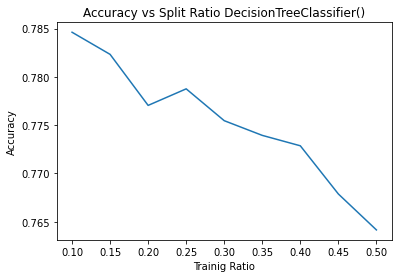

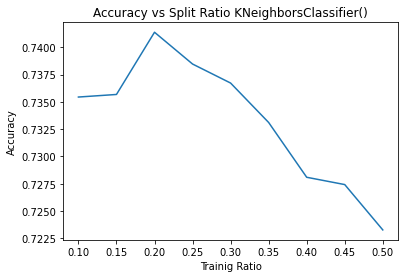

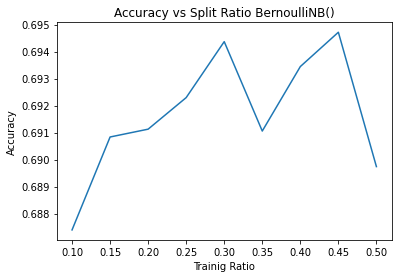

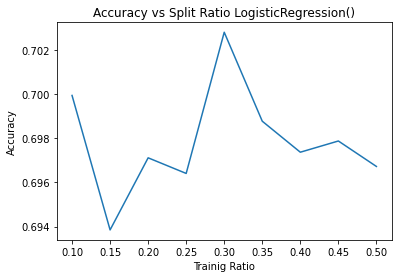

In [ ]:
#mlM = [dtree, svcS, gnb, bnb, rfc, logR, knn, adb]
mlM = [dtree, knn, bnb, logR]
for i in mlM:
  modelAcc(i)
  plotLine(trainRatio,accuracy, str(i))

Question 1 C: 

Ensemble Models

In [ ]:
#DEfining Monte Carlo Run Function
Eaccuracy=[]
def monteCarlo(model, split):
  Eaccuracy.clear()
  for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=split, random_state=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Eaccuracy.append(accuracy_score(y_test, y_pred))
  np.array(Eaccuracy)
  return Eaccuracy

Bagging ensemble model:

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
bagM = BaggingClassifier(base_estimator=dtree, n_estimators=50)


Boosting Ensemble Model:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100, learning_rate=.85)



Stacking Ensemble model

In [ ]:
from sklearn.ensemble import BaggingClassifier, StackingClassifier
estimators = [('rfc', RandomForestClassifier(n_estimators=30, random_state=1)),
             ('logR', LogisticRegression()),
             ('bnb', BernoulliNB()),
             ('dtree', DecisionTreeClassifier())]
level1 = rfc
staC = StackingClassifier(estimators=estimators, final_estimator=level1, cv=5)

Running the MonteCarlo and Box plot functions for each Ensemble Model:

[[0.8288801407153028, 0.821928134684647, 0.8334031325906692, 0.8205879889437976, 0.8308066002177736, 0.8281263087360751, 0.8272887176480442, 0.8313929139793953, 0.8297177318033336, 0.8317279504146076, 0.8292151771505151, 0.8269536812128319, 0.8323142641762291, 0.8293826953681213, 0.8339056872434877, 0.8210905435966162, 0.8197503978557669, 0.8276237540832565, 0.828042549627272, 0.8306390820001676, 0.8272887176480442, 0.8249434626015579, 0.8320629868498199, 0.825027221710361, 0.8263673674512103, 0.8212580618142223, 0.8298852500209398, 0.8303040455649552, 0.8272887176480442, 0.8272887176480442, 0.8242733897311333, 0.8268699221040288, 0.8338219281346847, 0.8282938269536813, 0.8302202864561521, 0.826032331015998, 0.8283775860624844, 0.8342407236787001, 0.8228494848814809, 0.8255297763631795, 0.8218443755758439, 0.8252784990367702, 0.8303878046737583, 0.8303040455649552, 0.832146745958623, 0.8228494848814809, 0.8234357986431025, 0.829047658932909, 0.8253622581455733, 0.8204204707261915, 0.82

{'boxes': [<matplotlib.lines.Line2D at 0x7f3226aa4f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3230789050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f323079d5d0>,
 'means': [<matplotlib.lines.Line2D at 0x7f323079d090>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3230789b10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3230797590>,
  <matplotlib.lines.Line2D at 0x7f323047b0d0>]}

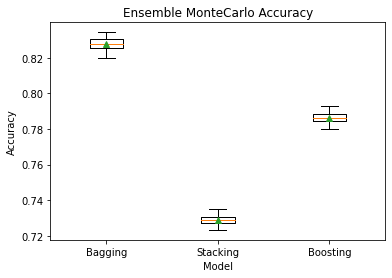

In [ ]:
ensModName = ['Bagging', 'Stacking','Boosting']
results = []
baggingScore=monteCarlo(bagM, .1)
results.append(baggingScore.copy())

boostingScore=monteCarlo(adb, .2)
results.append(boostingScore.copy())

stackingScore=monteCarlo(staC, .2)
results.append(stackingScore.copy())

plt.title("Ensemble MonteCarlo Accuracy")
plt.xlabel("Model" )
plt.ylabel("Accuracy")
plt.boxplot(results, labels=ensModName, showmeans=True)  

Question 2: 
Considering a continous attribute in your dataset as target variable perform regression analysis, visualize and interpret the results via ensemble mod

Preparing the dataset similar to the previous but swapping target category from the cancellation prediction to predicting the average daily rate paid for the hotel. 

In [ ]:
df = pd.read_csv("hotel_booking.csv")
#Replacing Months with a variable representing said month 
df.loc[df['arrival_date_month'] == 'January', 'arrival_date_month'] = 1
df.loc[df['arrival_date_month'] == 'February', 'arrival_date_month'] = 2
df.loc[df['arrival_date_month'] == 'March', 'arrival_date_month'] = 3
df.loc[df['arrival_date_month'] == 'April', 'arrival_date_month'] = 4
df.loc[df['arrival_date_month'] == 'May', 'arrival_date_month'] = 5
df.loc[df['arrival_date_month'] == 'June', 'arrival_date_month'] = 6
df.loc[df['arrival_date_month'] == 'July', 'arrival_date_month'] = 7
df.loc[df['arrival_date_month'] == 'August', 'arrival_date_month'] = 8
df.loc[df['arrival_date_month'] == 'September', 'arrival_date_month'] = 9
df.loc[df['arrival_date_month'] == 'October', 'arrival_date_month'] = 10
df.loc[df['arrival_date_month'] == 'November', 'arrival_date_month'] = 11
df.loc[df['arrival_date_month'] == 'December', 'arrival_date_month'] = 12
#Replacing hotel type with binary variable
df.loc[df['hotel'] == 'City Hotel', 'hotel'] = 0
df.loc[df['hotel'] == 'Resort Hotel', 'hotel'] = 1
#Dropping Company column as most entries are empty
df =df.drop(['company'],axis=1)
#If there is no response for children then defaulting to 0 
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(1)
X = df.drop(['adr'], axis=1)
y = df['adr']

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from statistics import variance
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


Bagging Model:

In [ ]:
bagR = BaggingRegressor(n_estimators = 30)
bag_scores = cross_val_score(bagR, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise')
print(np.mean(bag_scores))
print(std(bag_scores))

-20.707109023006485
2.7596739132469237


Stacking Model: 

Testing models for use in the stacking model

In [ ]:
rid = RidgeCV()
ridScore =cross_val_score(rid, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise')
print(np.mean(ridScore))
print(std(ridScore))

-29.77645321748768
6.289603321347784


In [ ]:
svrL = LinearSVR(random_state=42)
linSVR =cross_val_score(svrL, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise')
print(np.mean(linSVR))
print(std(linSVR))

In [ ]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr_Score =cross_val_score(dtr, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise')
print(np.mean(dtr_Score))
print(std(dtr_Score))

-34.18214864285981
7.7736312193175925


In [ ]:
rfr = RandomForestRegressor(n_estimators=10, random_state=42)
rfr_Score =cross_val_score(rfr, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise')
print(np.mean(rfr_Score))
print(std(rfr_Score))

-21.272672027705045
2.892715419495998


Stacking model itself

I chose the highest scoring models from cross validation tests for using in the stacking model 

In [ ]:
level0 = [
    ('rid', RidgeCV()),
    ('rfr', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('dtr', DecisionTreeRegressor(max_depth=2))]
staR = StackingRegressor(
    estimators=level0,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)    
stack_scores = cross_val_score(staR, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise')
print(np.mean(stack_scores))
print(std(stack_scores))

-28.602448763916765
5.386615860712546


Boosting

In [ ]:
gdr = GradientBoostingRegressor(random_state=0)
boost_scores = cross_val_score(gdr, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, error_score='raise')
print(np.mean(boost_scores))
print(std(boost_scores))

-23.165562520780014
3.7805329802329544


In [ ]:
featS = SelectKBest(score_func=f_regression, k='all')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, random_state=42)
featS.fit(X_train, y_train)
X_new_train = featS.transform(X_train)
X_new_test = featS.transform(X_test)

Functions for MonteCarlo Run

In [ ]:
Eaccuracy=[]
meanSqEr = []
def monteCarloRegressor(model, split):
  Eaccuracy.clear()
  meanSqEr.clear()
  for i in range(50):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=split, random_state=i)
    
    #model.fit(X_new_train, y_train)
    #y_pred = model.predict(X_new_test)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse=mean_squared_error(y_pred,y_test)
    Rsquar=1-mse/variance(y_test)
    meanSqEr.append(mse)
    Eaccuracy.append(Rsquar)
  print(model)  
  print("Rsquare Average:", np.mean(Eaccuracy))
  print('Rsquare St Deviation:', np.std(Eaccuracy))
  print("MSE Average:", np.mean(meanSqEr))
  print('MSE St Deviation:', np.std(meanSqEr))
  np.array(Eaccuracy)
  return Eaccuracy

Running The Regression Models:

BaggingRegressor(n_estimators=30)
Rsquare Average: 0.738898513017142
Rsquare St Deviation: 0.08995384307229214
MSE Average: 702.9565661509488
MSE St Deviation: 351.2858775712285
GradientBoostingRegressor(random_state=0)
Rsquare Average: 0.6023931559311806
Rsquare St Deviation: 0.07764502924405836
MSE Average: 1048.9296730467872
MSE St Deviation: 366.50252446221526
StackingRegressor(estimators=[('rid',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('rfr',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=42)),
                              ('dtr', DecisionTreeRegressor(max_depth=2))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))
Rsquare Average: 0.6544424835278788
Rsquare St Deviation: 0.12640348218827935
MSE Average: 908.4873223355386
MSE St D

{'boxes': [<matplotlib.lines.Line2D at 0x7f37c35d7d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37c3b8ddd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f37c3b75390>,
 'means': [<matplotlib.lines.Line2D at 0x7f37c35d7210>,
 'medians': [<matplotlib.lines.Line2D at 0x7f37c3b8e8d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f37c3b8d350>,
  <matplotlib.lines.Line2D at 0x7f37c34bf5d0>]}

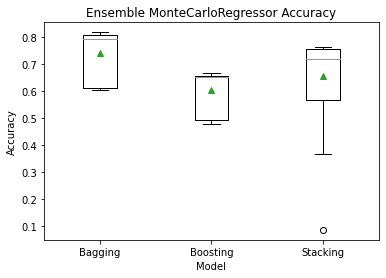

In [ ]:
ensModName = ['Bagging','Boosting','Stacking']
results = []
baggingScore=monteCarloRegressor(bagR, .3)
results.append(baggingScore.copy())

boostingScore=monteCarloRegressor(gdr, .3)
results.append(boostingScore.copy())

stackingScore=monteCarloRegressor(staR, .3)
results.append(stackingScore.copy())


plt.title("Ensemble MonteCarloRegressor Accuracy")
plt.xlabel("Model" )
plt.ylabel("Accuracy")
plt.boxplot(results, labels=ensModName, showmeans=True)  

Question 3

A - Use LDA to classify the dataset into a few classes so that at least 90% of information is contained through new classification 

B- Apply PCA and idtenify the important principal components involving at least 90% of dataset variation. Explain your decision strategy. Plot Pricipal Components vs their variance.

Queation 3 A LDA

In [ ]:
df = pd.read_csv("nfl2008_fga.csv")
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
df = df.dropna()
X = df[['ydline', 'kicker', 'togo']]
y = df['qtr']
lda.fit(X, y)
transformed = lda.transform(X)

In [ ]:
LDA = pd.DataFrame(transformed)
LDA

,0,1,2
0,-0.040506,1.283103,0.816009
1,0.662508,-0.864480,-1.224952
2,-0.728257,0.426704,-0.818553
3,-0.166180,-0.468854,-1.441682
4,1.321403,1.887342,2.712456
...,...,...,...
1032,-0.700139,-1.952926,-0.219118
1033,0.887177,1.583448,0.699414
1034,0.841748,1.065033,0.024364
1035,1.162518,-0.265570,-1.178526


In [ ]:
lda.explained_variance_ratio_

array([0.6150293 , 0.32201294, 0.06295776])

In [ ]:
LDA = LDA.drop(2)

2 LD's were chosen as the variaance of the third LD was comparitivly much lower variance, Added to which variance of LDA1 and LDA2 add up to .93 

Question 3B PCA

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
df = pd.read_csv("nfl2008_fga.csv")

X = df[["togo","ydline","kicker","distance","homekick","kickdiff"]]
X.isna().sum()


togo        2
ydline      0
kicker      0
distance    0
homekick    0
kickdiff    0
dtype: int64

In [ ]:
X = X.dropna()
model=pca.fit_transform(X)

In [ ]:
pcaVar = pca.explained_variance_ratio_
pcDF = pd.DataFrame(pca.explained_variance_ratio_)
pcDF

,0
0,0.448386
1,0.297480
2,0.218312
3,0.035031
4,0.000559
5,0.000233


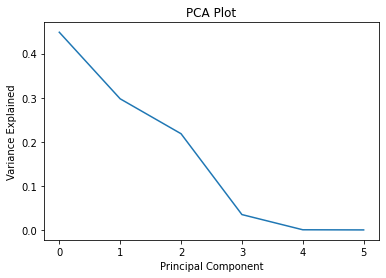

In [ ]:
import matplotlib.pyplot as plt
PC_Val =np.arange(pca.n_components_)
plt.plot(PC_Val, pca.explained_variance_ratio_)
plt.title('PCA Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

From the above I would choose the first 3 PCA as they cover over 90% of the varaince in the dataframe provided. 